# GSE GenAI Research Repo Keyword Frequency Analysis

**Author:** Michael Spencer

**Purpose:** Analyzes scraped data from the `web_scraper.py` script and conducts a basic keyword frequency analysis.

## Instructions

Basic Text Analysis
- Perform a basic keyword frequency analysis on the scraped data.
- Provide a brief summary (2-3 sentences) of the key information extracted from the data.
- Present your findings in a concise report (max 1 page, tables/figures excluded) that
includes a list of all papers’ metadata (title, author(s), date, etc.).

### Research Plan

- Read in CSV
- Perform frequency analysis on title and abstract, respectively they provide context on the high-level wording used in the field and the more meaningful methodologies, results and significance of the work.
  - Concatenate title and abstract for each article.
  - Tokenize and clean words (i.e. removing stopwords, convert to lowercase, remove punctuation, etc.)
  - I'm going to try looking at individual words first, but I also want to quickly look at bi-grams since there are many in the field (i.e. artifical intelligence, machine learning, etc.)
- Sort results based on keyword frequency
  - Visualize top words via a bar chart.
- Draw conclusions

## Setup

### Libraries

pip install nltk

In [120]:
# Environment libraries
from pathlib import Path

#Analysis libraries
import pandas as pd
import nltk
import re # For text cleaning
from nltk.corpus import stopwords
from nltk.util import ngrams

# Visualization libraries
from plotnine import *

### Variables

In [121]:
PROJECT_ROOT = str(Path.cwd().resolve().parent)
PATH_DATA = PROJECT_ROOT + "/data/clean/gse_genai_articles.csv"

## Load the Data

In [136]:
data_articles = pd.read_csv(PATH_DATA)
data_articles

,Title,Authors,Date,Publisher,Link,Abstract,What is the application?,Who is the user?,What age?,Why use AI?,Study design
0,A Comprehensive Review on Generative AI for Ed...,"Uday Mittal, Siva Sai, Vinay Chamola, Devika S...",09/2024,IEEE,https://ieeexplore.ieee.org/document/10695056,Artificial Intelligence (AI) has immense poten...,"Teaching – Instructional Materials, Teaching –...","Student, Educator, School Leader","Elementary (PK5), Middle School (6-8), High Sc...","Efficiency, Outcomes – Literacy, Outcomes – Nu...",Systematic Review
1,A Digital Recommendation System for Personaliz...,"Dhananjaya. G. M., R. H. Goudar, Anjanabhargav...",02/2024,IEEE,https://ieeexplore.ieee.org/document/10445145,This review delves into using e-learning techn...,"Teaching – Instructional Materials, Teaching –...","Student, Educator","Elementary (PK5), Middle School (6-8), High Sc...","Efficiency, Outcomes – Differentiation",Systematic Review
2,A Framework for Responsible AI Education: A Wo...,"Caitlin Bentley, Christine Aicardi, Sammia Pov...",08/2023,SSRN,https://papers.ssrn.com/sol3/papers.cfm?abstra...,"With the emergence of generative AI, and its d...","Teaching – Instructional Materials, Teaching –...","Student, Educator, School Leader","High School (9-12), Post-Secondary","Outcomes – Differentiation, Outcomes – Durable...","Descriptive – Implementation and Use, Systemat..."
3,A Perspective on K-12 AI Education,"Nathan Wang, Paul Tonko, Nikil Ragav, Michael ...",01/2023,arXiv,https://arxiv.org/abs/2206.03217,"Artificial intelligence (AI), which enables ma...","Teaching – Instructional Materials, Teaching –...","Educator, School Leader",High School (9-12),"Outcomes – Other Academic, Outcomes – Differen...",Descriptive – Product Development
4,A Review of Artificial Intelligence (AI) in Ed...,"Pongsakorn Limna, Somporch Jakwatanatham, Suti...",07/2022,SSRN,https://papers.ssrn.com/sol3/papers.cfm?abstra...,Objective: Artificial intelligence (AI) plays ...,"Teaching – Instructional Materials, Teaching –...","Student, Educator, School Leader","Elementary (PK5), Middle School (6-8), High Sc...","Efficiency, Outcomes – Other Academic, Outcome...",Systematic Review
...,...,...,...,...,...,...,...,...,...,...,...
71,Tuning Music Education: AI-Powered Personaliza...,"Mayank Sanganeria, Rohan Gala",12/2024,arXiv,https://arxiv.org/abs/2412.13514,Recent AI-driven step-function advances in sev...,"Teaching – Instructional Materials, Learning –...","Student, Educator","High School (9-12), Post-Secondary, Adult","Efficiency, Outcomes – Differentiation",Descriptive – Product Development
72,Tutor CoPilot: A Human-AI Approach for Scaling...,"Rose E. Wang, Ana T. Ribeiro, Carly D. Robinso...",10/2024,EdWorkingPapers.com,https://edworkingpapers.com/ai24-1054,"Generative AI, particularly Language Models (L...","Teaching – Professional Learning, Learning – S...",Educator,"Elementary (PK5), Middle School (6-8)","Efficiency, Outcomes – Other Academic",Impact – Randomized Controlled Trial
73,Use Scenarios & Practical Examples of AI Use i...,"Dara Cassidy, Yann-Aël Le Borgne, Francisco Be...",07/2024,arXiv,https://arxiv.org/abs/2309.12320,This report presents a set of use scenarios ba...,"Teaching – Instructional Materials, Teaching –...","Student, Educator","Elementary (PK5), Middle School (6-8), High Sc...","Efficiency, Outcomes – Other Academic, Outcome...",Descriptive – Implementation and Use
74,Use of Artificial Intelligence in Education,Ashok Panigrahi,05/2020,SSRN,https://papers.ssrn.com/sol3/papers.cfm?abstra...,"Today, artificial intelligence is one of the e...","Teaching – Instructional Materials, Teaching –...","Student, Educator, School Leader","Elementary (PK5), Middle School (6-8), High Sc...","Efficiency, Outcomes – Other Academic, Outcome...",Descriptive – Implementation and Use


The data should already be cleaned per our scraping script, so I won't conduct any additional cleaning on the table as a whole. Below I will begin analyzing the data and preparing the individual words for analysis.

## Data Analysis

### Text Parsing

I'm am going to use both the article titles and the abstracts for the keyword frequency analysis. Each of those two datapoints contain valuable information that inform us, respectively, about:
1. Common words used to describe work at a high level
2. Common words used in describing methodologies, significance and results

In [123]:
article_text = data_articles["Title"] + " " + data_articles["Abstract"]
article_corpus = article_text.str.cat(sep=' ')

### Text Cleaning

In [124]:
# Lowercase text and remove punctuation and digits
article_corpus = re.sub(r'[^a-zA-Z\s]', '', article_corpus.lower())

# Tokenize the corpus and remove stopwords
tokenized_corpus = nltk.word_tokenize(article_corpus, language='english', preserve_line=True)
cleaned_corpus = [token for token in tokenized_corpus if token not in stopwords.words('english')]

### Keyword Counts

In [134]:
# Count individual word frequencies and show top 15
word_freq = nltk.FreqDist(cleaned_corpus)

# Convert to DataFrame and take the top 20 words
data_word_freq = (pd.DataFrame(word_freq.items(), columns = ["word", "count"])
                    .sort_values(by='count', ascending=False))

data_word_freq.head(30)

,word,count
3,ai,286
10,learning,212
4,education,176
167,students,118
615,chatgpt,89
6,intelligence,78
5,artificial,76
15,educational,75
2,generative,72
249,teachers,66


In [135]:
bigrams_list = list(ngrams(cleaned_corpus, 2))

# Concatenate the words in the bigrams list to create a list of strings
bigrams_list = [' '.join(bigram) for bigram in bigrams_list]

# Count individual word frequencies and show top 15
bigram_freq = nltk.FreqDist(bigrams_list)

# Convert to DataFrame and take the top 20 words
data_bigram_freq = (pd.DataFrame(bigram_freq.items(), columns = ["bigram", "count"])
                    .sort_values(by='count', ascending=False))

data_bigram_freq.head(30)

,bigram,count
5,artificial intelligence,72
2,generative ai,62
3,ai education,33
6,intelligence ai,26
405,ai literacy,17
1048,language models,15
337,ai tools,15
1617,lesson plans,14
173,machine learning,14
237,learning experience,14


### Visualizations

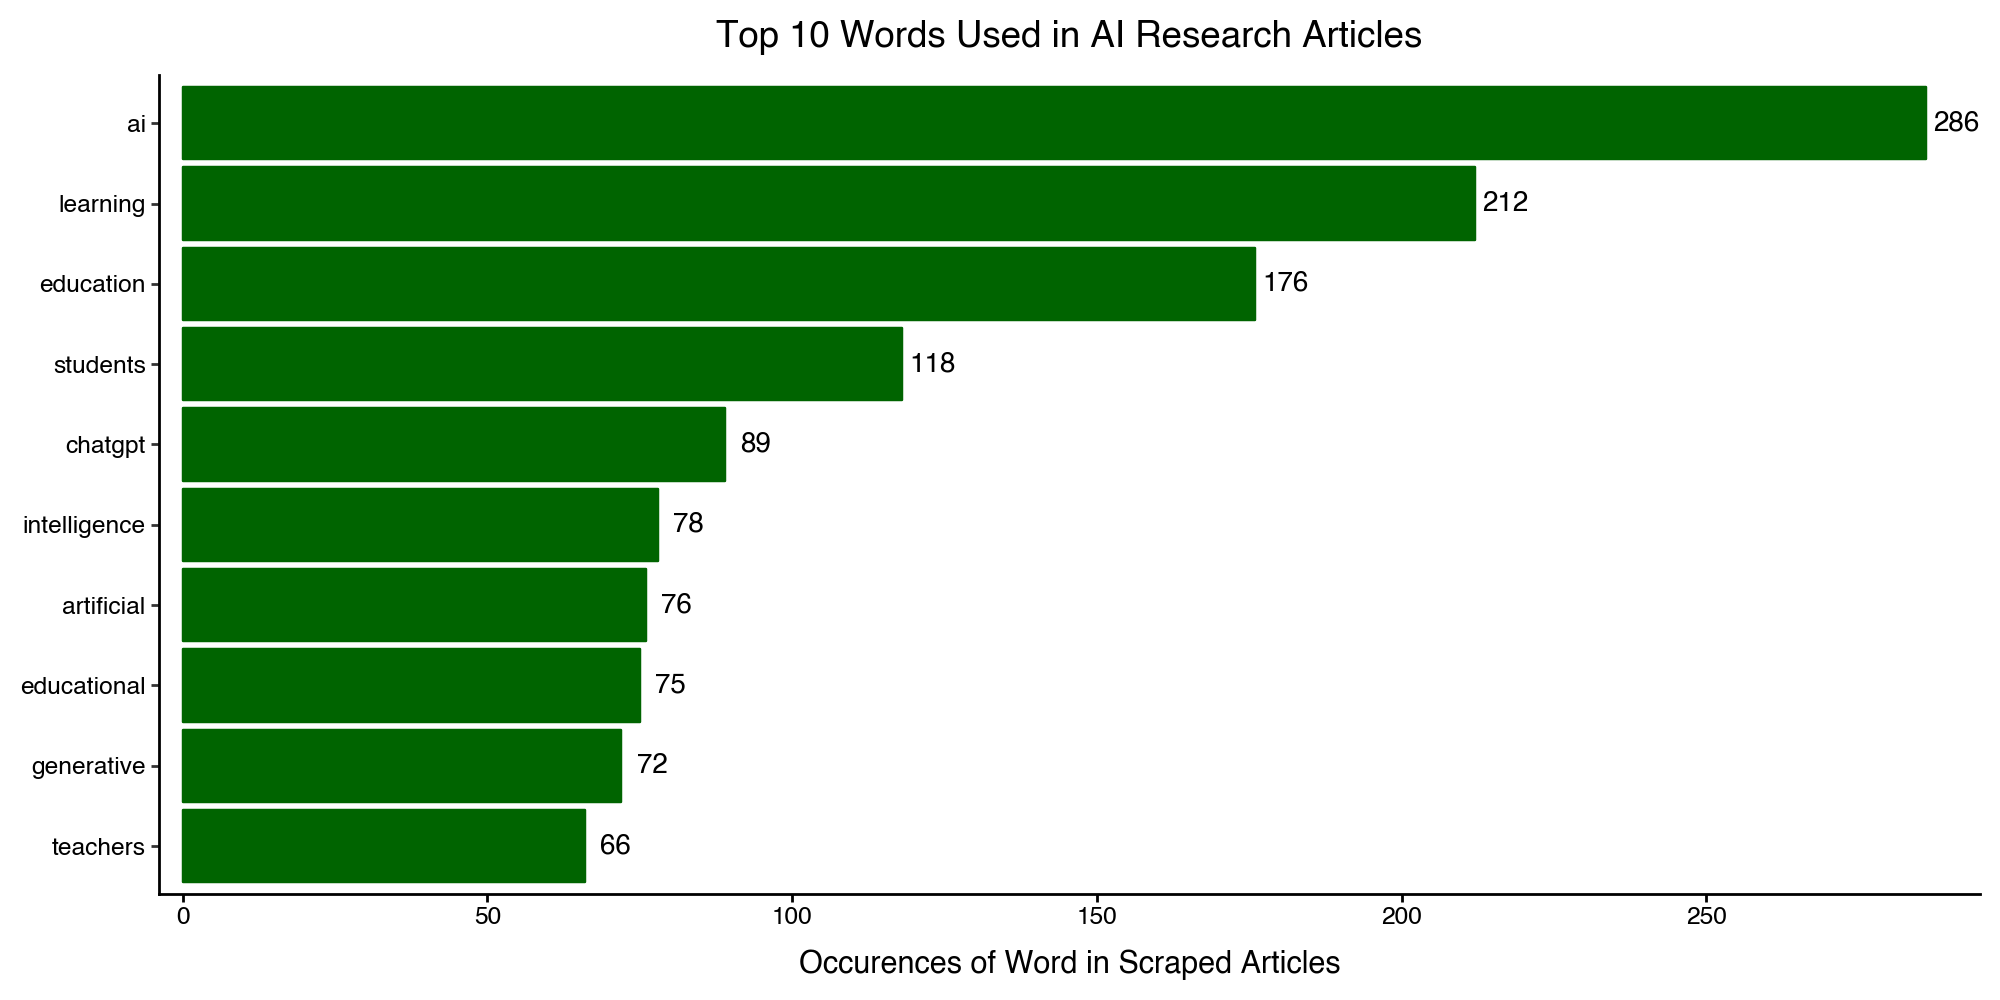

In [131]:
(ggplot(data_word_freq.head(10), aes(x = 'reorder(word, count)', y = 'count')) +
 geom_col(fill = 'darkgreen', color = 'darkgreen') +
 geom_text(
  aes(label = 'count'),
  nudge_y = 5,
  size = 10
 ) +
 labs(
  title = "Top 10 Words Used in AI Research Articles",
  x = "",
  y = "Occurences of Word in Scraped Articles"
 ) +
 coord_flip() +
 scale_y_continuous(expand = (.01, 1), breaks = range(0, 300, 50)) +
 theme(
  panel_background = element_blank(),
  panel_grid_major = element_blank(),
  axis_ticks_major_x = element_text(color = "black"),
  axis_line = element_line(color = "black", size = 1),
  text = element_text(color = "black"),
  figure_size=[10, 5]
 ))


The top words that appear in the scraped research articles are "AI", "learning" and "education," reflective of the fact that these articles are about generative AI in education.

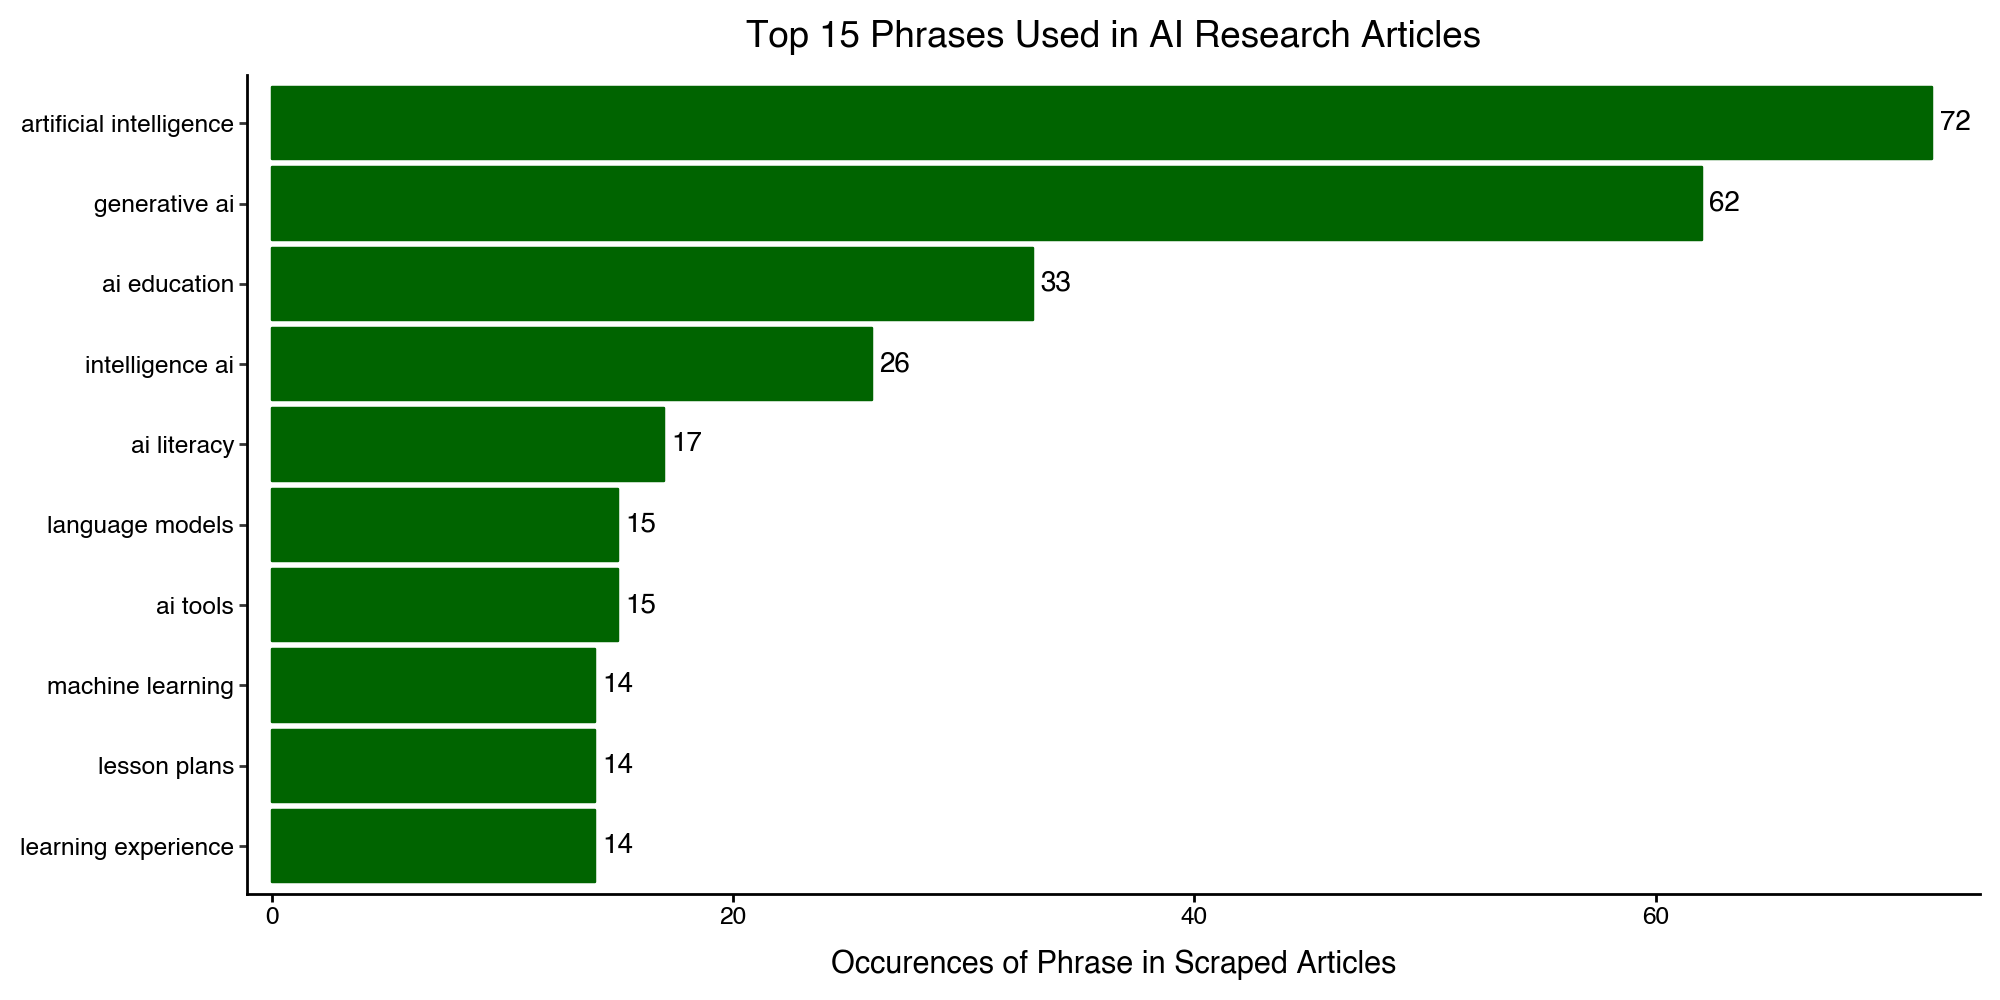

In [132]:
(ggplot(data_bigram_freq.head(10), aes(x = 'reorder(bigram, count)', y = 'count')) +
 geom_col(fill = 'darkgreen', color = 'darkgreen') +
 geom_text(
  aes(label = 'count'),
  nudge_y = 1,
  size = 10
 ) +
 labs(
  title = "Top 15 Phrases Used in AI Research Articles",
  x = "",
  y = "Occurences of Phrase in Scraped Articles"
 ) +
 coord_flip() +
 scale_y_continuous(expand = (.001, 1)) +
 theme(
  panel_background = element_blank(),
  panel_grid_major = element_blank(),
  axis_ticks_major_x = element_text(color = "black"),
  axis_line = element_line(color = "black", size = 1),
  text = element_text(color = "black"),
  figure_size=[10, 5]
 ))